##### <h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO T780: Applied Machine Learning</h2>
<h3 style = "text-align:center">Assignment 3</h3>
<h4> </h4>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Friday, August 21, 2020</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR TEAM NUMBER AND MEMBERS' NAMES BELOW</h3>

### TEAM NUMBER: 05

### TEAM MEMBERS:
Name: John Ray Martinez, ID: JBM332, Email: jbm3322@drexel.edu

Name: Jonathan Musni, ID: JEM742, Email: jem742@drexel.edu

Name: Juan Miguel Trinidad, ID: JBT46, Email: jbt46@drexel.edu
### A. Assignment Overview
This assignment provides the opportunity for you to practice with various skills in data pre-processing, feature analyses, and model tuning. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59 pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

### F. Academic Honesty

Each student is required to submit the Academic Honesty Form at the beginning of the term to cover all the deliverables (for example: assignments, projects, quizzes). Each piece of work must be original. That means, individual quizzes must be done individually without discussing and collaborating with anybody else. Team assignments must be written and programmed by your own team members. No team should copy any piece of work from other teams. The Drexel University Academic Honesty Rules and Procedures (as stated in the student handbook) will be adhered to strictly.  

### G. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comment.
2. Use appropriate indentations to indicate control flows and blocks of code. 
3. When breaking up a long line, break it before an operator, not after. 

### H. Answer the following questions: 
Your answer should be combined with code and brief text answer. Please ensure that your Jupyter notebook does not have too much spurious output. If you like, you can share your notebook in progress with me on Kaggle: leiwangv (lw474@drexel.edu)

### Data for this assignment:
* URL: https://www.kaggle.com/ajaysingh123/wine-quality-clustering-unsupervised
* On Kaggel Notebook, you can add the data set by searching the above URL
* In the unsupervised learning part of this assignment, you should work without the ground truth labels. (Drop the corresponding column)


In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Dimension Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import precision_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#defined the color scheme of scatter plot
flatui = ["#9b59b6", "#3498db", "#f1c40f", "#e74c3c", "#34495e", "#2ecc71"]

In [3]:
# On Kaggle Notebook, after adding the data, you can import the data as Pandas DataFrame as follows

try:
    df = pd.read_csv("winequality-red.csv")
except:
    try:
        df = pd.read_csv("https://raw.githubusercontent.com/miggytrinidad/INFOT70_A3/master/winequality-red.csv")
    except:
        df = pd.read_csv("../input/wine-quality-clustering-unsupervised/winequality-red.csv")
        

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Question 1:
Create plots to visualize the distribution of all features. What did you find out?

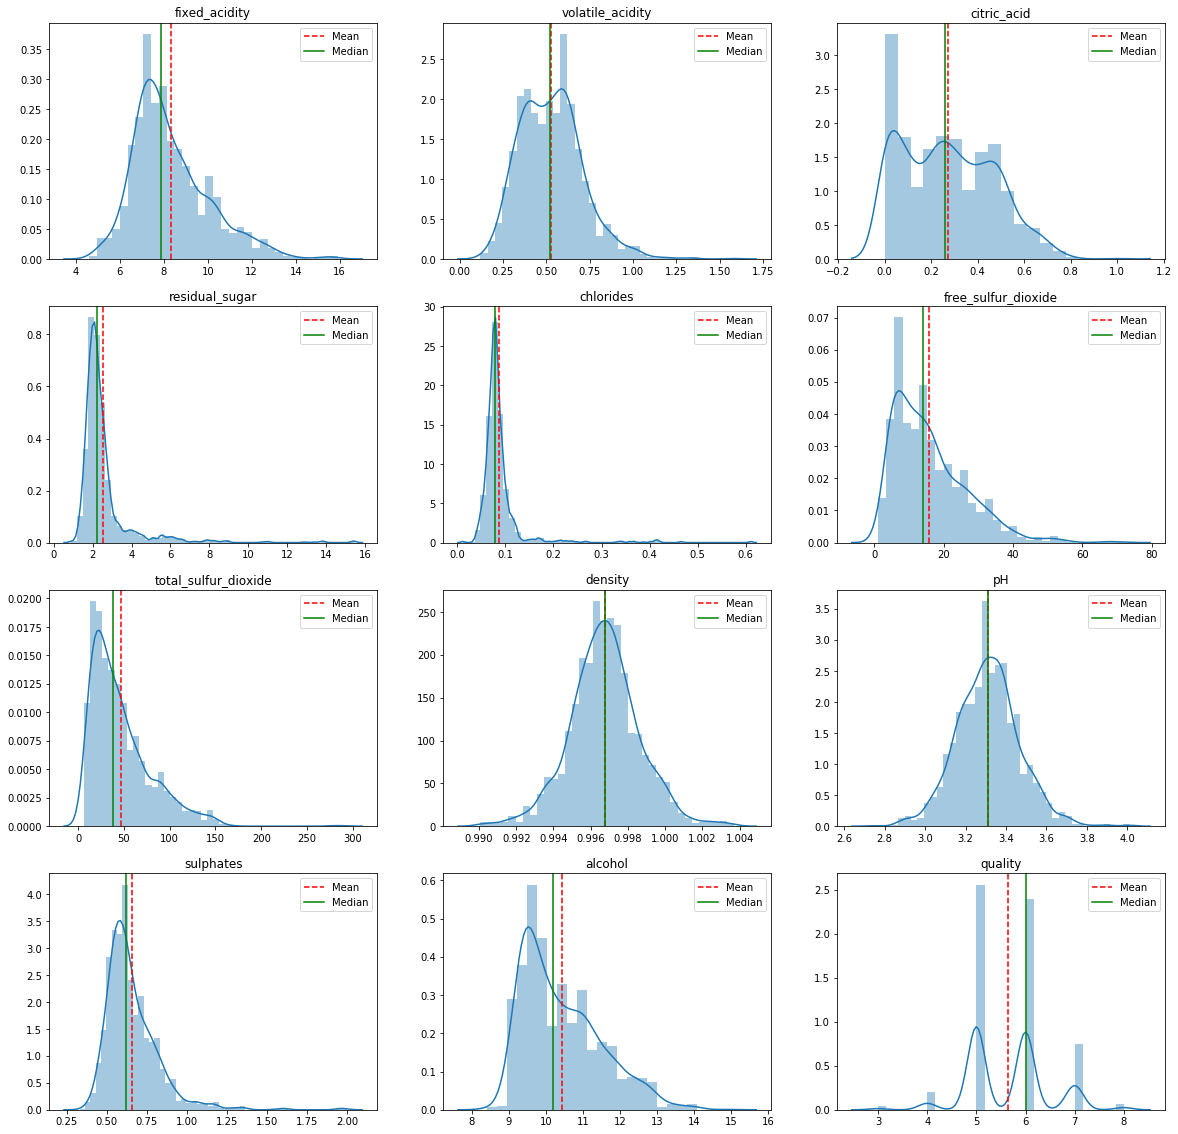

In [4]:
fig1 = plt.figure(figsize=(20,20), facecolor='white')
grid_spec = fig1.add_gridspec(ncols = 3, nrows= math.ceil(len(df.columns) / 3))

fig_row = 0
fig_col = 0
for col in df.columns:
    f_ax = fig1.add_subplot(grid_spec[fig_row, fig_col])
    f_ax.set_title(col)
    
    #get the mean and median values of each column
    mean=df[col].mean()
    median=df[col].median()

    sns.distplot(df[col], ax = f_ax)
    #plot mean and median in the distplot
    f_ax.axvline(mean, color='r', linestyle='--')
    f_ax.axvline(median, color='g', linestyle='-')
    
    #labels
    f_ax.set_xlabel("")
    plt.legend({'Mean':mean,'Median':median})
    
    #next column
    fig_col +=1
    #making sure there are only three graphs in each column
    if fig_col == 3:
        fig_col = 0
        fig_row +=1    

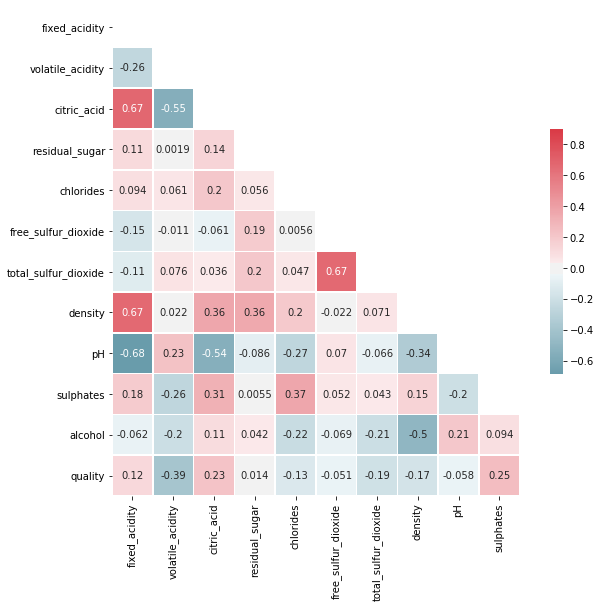

In [5]:
corr = df.corr().iloc[:,:-2]
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Observations:
* Majority of the features are skewed to the right.
* The 'density' column resembles a bell-shaped curve, and the mean and median values are in the middle, signifying a normally distributed data.
* The 'quality' is the target variable of the dataset. The higher the value, the higher the quality of the wine is. However, in this dataset, the distribution of each quality is imbalanced.
* Our initial hypothesis is the clusters well not be well defined because of the imbalanced data distribution.

#### Question 2:
Create plots to visualize the data using PCA (top two principal components). Plot explained variance (%) in PCA. What would be a good threshold for the number of principal components if you wanted to reduce the dimensionality of the data?

In [6]:
features = df.columns.tolist()

#features
X = df[features[:-1]]

#target variable - quality
y = df["quality"]

In [7]:
#Scale the data before doing Dimension Reduction 
X_scaled = StandardScaler().fit_transform(X)

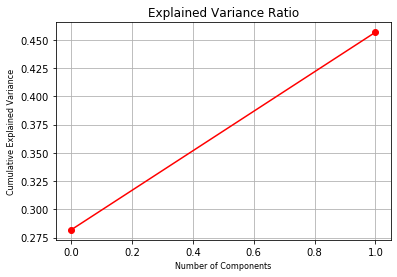

In [8]:
pca = PCA(n_components  = 2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title("Explained Variance Ratio")
plt.xlabel("Number of Components", fontsize = 8)
plt.ylabel("Cumulative Explained Variance", fontsize = 8)
plt.grid()

In [9]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_.sum()))

Explained variation per principal component: 0.45682201184235893


Using n_components = 2, the data represented 45% which is not a good.

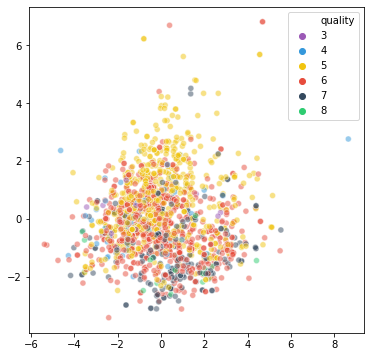

In [10]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x = X_pca[:,0], 
    y= X_pca[:,1],
    hue=y,
    palette=sns.color_palette(flatui),
    data = X,
    legend="full",
    alpha = 0.5
)

Since the result of the previous PCA is not good, we'll look into the optimal number of components that will better explain the information of the data. 

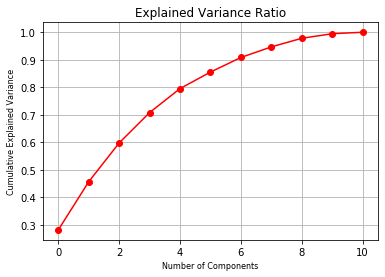

In [11]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title("Explained Variance Ratio")
plt.xlabel("Number of Components", fontsize = 8)
plt.ylabel("Cumulative Explained Variance", fontsize = 8)
plt.grid()

Based on the graph above, A good number of components to reduce the dimensionality of the data is six(6) because it holds around 90% information of the data.

Explained variation per principal component: [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439]
Total Explained Variation: 0.855247135076294


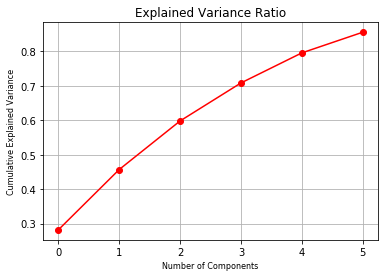

In [12]:
pca = PCA(n_components = 6)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title("Explained Variance Ratio")
plt.xlabel("Number of Components", fontsize = 8)
plt.ylabel("Cumulative Explained Variance", fontsize = 8)
plt.grid()
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Total Explained Variation: {}'.format(pca.explained_variance_ratio_.sum()))

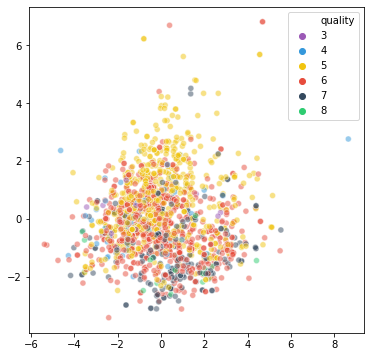

In [13]:
#plot first two components 
plt.figure(figsize=(6,6))
sns.scatterplot(
    x = X_pca[:,0], 
    y= X_pca[:,1],
    hue=y,
    palette=sns.color_palette(flatui),
    data = X,
    legend="full",
    alpha = 0.5
)

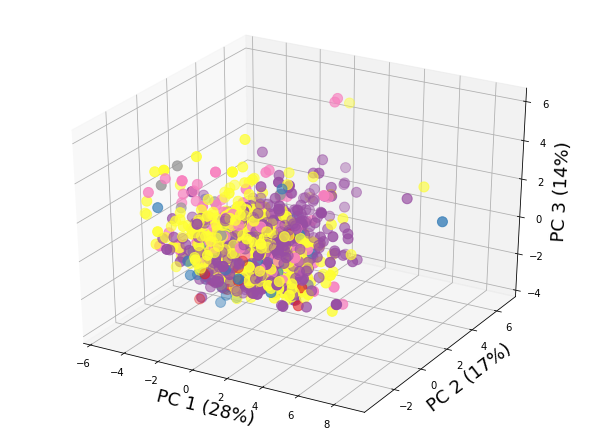

In [14]:
from mpl_toolkits.mplot3d import Axes3D

#plot first 3 components of pca
fig = plt.figure(figsize=(8,6)) 
ax = Axes3D(fig)
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=y, s=100, cmap="Set1")
ax.set_xlabel('PC 1 (28%)',fontsize=18)
ax.set_ylabel('PC 2 (17%)',fontsize=18)
ax.set_zlabel('PC 3 (14%)',fontsize=18) 
plt.show()

PCA is trained with n_components = 6 because it represents 86% data. However, since we are dealing with we highly imbalanced dataset, the clusters are not well defined in the graphs. We were not able to differentiate each cluster from each other, even after using n_components = 6.

In the next section, we will look at another dimension reduction technique called TSNE and see if the result is better than what we had.

#### Question 3: 
Create plots to visualize the data using t-SNE. Would parameter tuning help to gain a better visualization? Discuss your results and findings.

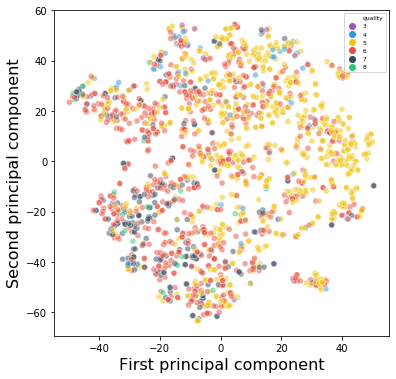

In [15]:
#TSNE with default parameters
tsne = TSNE(n_components=2, random_state = 42)
wine_tsne = tsne.fit_transform(X_scaled)


plt.figure(figsize=(6, 6))

sns.scatterplot(
    x= wine_tsne[:,0], 
    y= wine_tsne[:,1],
    hue= y,
    palette=sns.color_palette(flatui),
    data = X,
    legend = "full",
    alpha = 0.5
)

plt.xlabel("First principal component", fontsize = 16)
plt.ylabel("Second principal component", fontsize = 16)
plt.legend(loc="upper right", prop={'size': 6})

Utilizing the TSNE algorithm from sklearn with default parameters is showing a little improvement from PCA. Although the clusters are still not well defined.

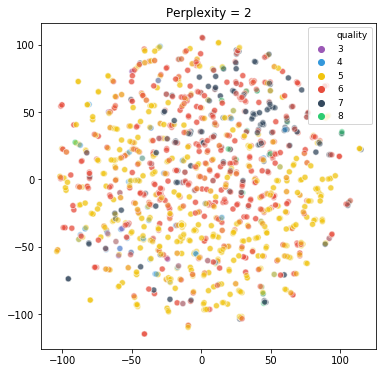

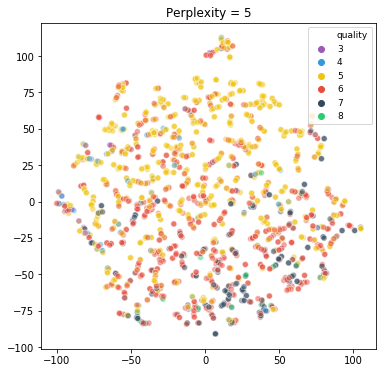

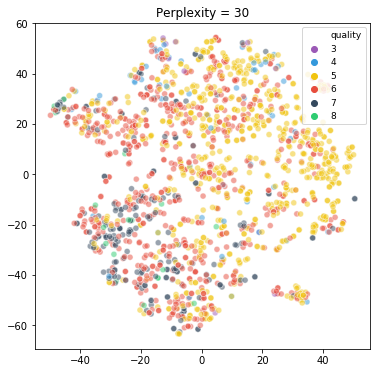

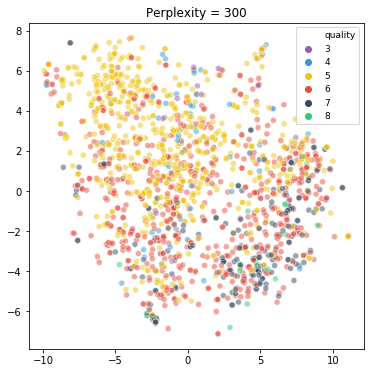

In [16]:
for i, perplexity in enumerate([2, 5, 30, 300]):
    wine_tsne = TSNE(n_components = 2,perplexity=perplexity, random_state = 42).fit_transform(X_scaled)
    
    plt.figure(figsize=(6, 6))
    sns.scatterplot(
        x = wine_tsne[:,0], 
        y = wine_tsne[:,1],
        hue=y,
        palette=sns.color_palette(flatui),
        data = X,
        legend = "full",
        alpha = 0.5
    )
    
    plt.legend(loc="upper right", prop={'size': 9})
    plt.title("Perplexity = {}".format(perplexity))

The purpose of perplexity is to set how many close neighbors a point will be having. A low perplexity value will result in a more scattered data points while a high value whill tend to group data points together. After doing several perplexity value, we can observe that as we increase the value, we tend to see a concentration of datapoints within the graph. Although, clusters are still not well defined because of the problematic data distribution.

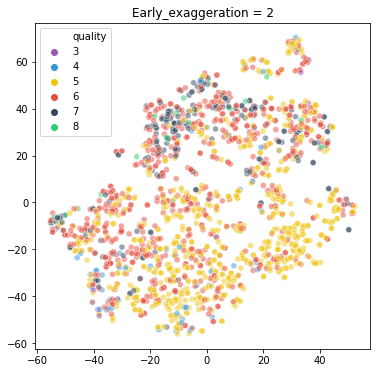

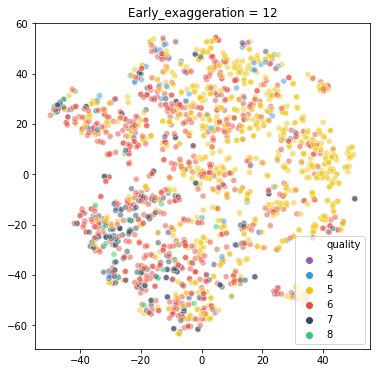

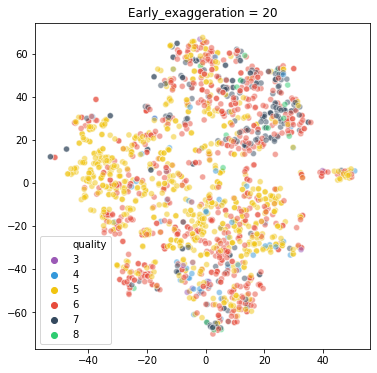

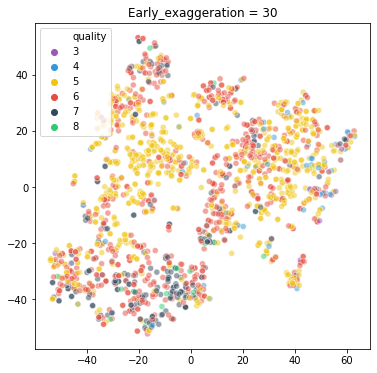

In [17]:
for i, early_exaggeration in enumerate([2, 12, 20, 30]):
    wine_tsne = TSNE(perplexity=30, early_exaggeration=early_exaggeration, random_state = 42).fit_transform(X_scaled)
    
    plt.figure(figsize=(6, 6))
    sns.scatterplot(
        x = wine_tsne[:,0], 
        y = wine_tsne[:,1],
        hue = y,
        palette=sns.color_palette(flatui),
        data = X,
        legend = "full",
        alpha = 0.5
    )
    
    plt.title("Early_exaggeration = {}".format(early_exaggeration))

Even after tuning the parameter of TSNE, clusters are still not well defined in the graphs. However, TSNE was able to show points of the same class closer together and separates it somehow from other data points that PCA was not able to achieve.

#### Question 4: 
Use different clustering algorithms to cluster the data: K-Means, DBSCAN, Agglomerative clustering, Gaussian Mixture. For each algorithm, tune the parameters for a reasonable outcome, inspect and visualize the outcome. Discuss your results and findings.

Both dimension reduction algorithms were unable to show clusters between the classes, even tuning them with different parameters. Even in that case, we will use the reduced dimension data in the training of our models.

In [18]:
#Use the reduced dimension dataset that can help us train our classifiers
#https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne/264647#264647
X_train_reduced = X_pca

##### K - Means

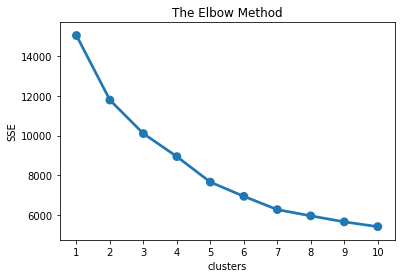

"Using the 'Elbow Method', the best number of clusters to train our model is 5."

In [19]:
# find the ideal number of clusters using the elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_reduced)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center
    
# Plot SSE for each k
plt.title('The Elbow Method')
plt.xlabel('clusters')
plt.ylabel('SSE') 
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()
display("Using the 'Elbow Method', the best number of clusters to train our model is 5.")

In [20]:
# visually check, 2 clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state = 42)
kmeans.fit(X_train_reduced)

#check inertia value and silhouette score

print("Inertia", kmeans.inertia_)
print("Silhouette Score", silhouette_score(X_train_reduced, kmeans.labels_ ))

Inertia 7652.379902189837
Silhouette Score 0.232399277445514


The inertia value is very high, and the silhouette score is very low, indicating a low performing model.

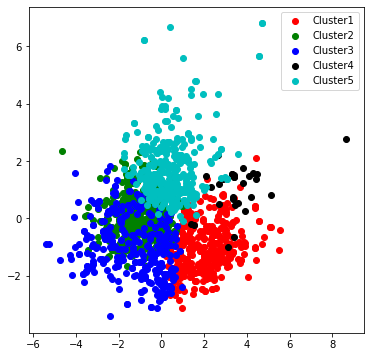

In [21]:
#2D plot
plt.figure(figsize=(6, 6))
colors = 'rgbkcmy'
for i in np.unique(kmeans.labels_):
    plt.scatter(X_train_reduced[kmeans.labels_==i,0],
               X_train_reduced[kmeans.labels_==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

Our inertia value indicated that the model would not perform well, and the graph above clearly supports that. There are five defined clusters, but they are overlapping each other.

##### DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
from itertools import cycle, islice

dbscan = DBSCAN(algorithm='auto', eps = 0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples= 3, n_jobs=None, p=None)
dbscan.fit(X_train_reduced)

unique_labels = set(dbscan.labels_)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

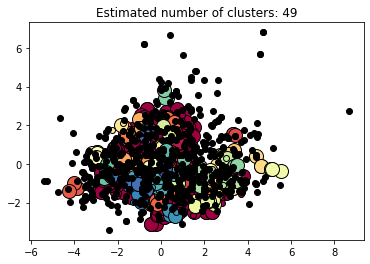

In [23]:
#Visualization Reference: https://www.kaggle.com/aeyjpn/women-love-shopping-clustering-with-dbscan
realClusterNum=len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
clusterNum = len(set(dbscan.labels_)) 

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan.labels_ == k)

    xy = X_train_reduced[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_train_reduced[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

##### Agglomerative clustering

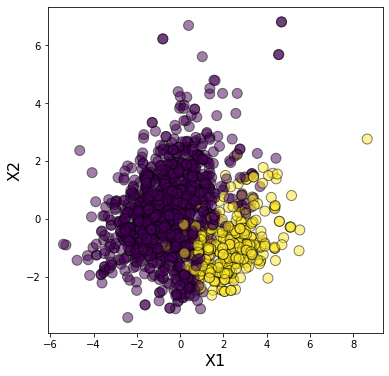

In [24]:
from sklearn.cluster import AgglomerativeClustering

agglo_clustering = AgglomerativeClustering(n_clusters = 2)
agglo_clustering.fit(X_train_reduced)

plt.figure(figsize=(6,6))
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c = agglo_clustering.labels_, alpha=.5, s = 100, edgecolors='k')
plt.xlabel("X1", fontsize = 16)
plt.ylabel("X2", fontsize = 16)
plt.show()

Two defined clusters are using agglomerative clustering. It seems that both clusters can be separated clearly. However, there are still some overlapping data points.

##### Gaussian Mixture

In [25]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, n_init=10, random_state=42)
gmm_predictions = gm.fit_predict(X_train_reduced)

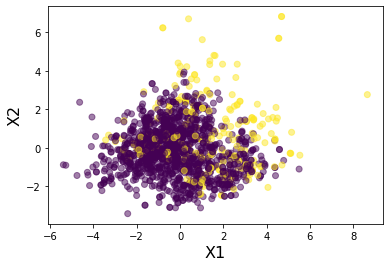

In [26]:
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], c=gmm_predictions, alpha = 0.5)
plt.xlabel("X1", fontsize = 16)
plt.ylabel("X2", fontsize = 16)
plt.show()

Gaussian Mixture seems the most off compared to the other three unsupervised models above.

#### Question 5:
Evaluate your results with the ground truth label: [Normalized Mutual Information score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) and [Adjust Rand Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html ). Discuss how well did you do in Question 4.

In [27]:
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

#compute the scores 
k_means_nmis = normalized_mutual_info_score(y, kmeans.labels_)
k_means_ars = adjusted_rand_score(y, kmeans.labels_)

dbscan_nmis = normalized_mutual_info_score(y, dbscan.labels_)
dbscan_ars = adjusted_rand_score(y, dbscan.labels_)

agglomerative_clustering_nmis = normalized_mutual_info_score(y, agglo_clustering.labels_)
agglomerative_clustering_ars = adjusted_rand_score(y, agglo_clustering.labels_)

gaussian_mixture_nmis = normalized_mutual_info_score(y, gmm_predictions)
gaussian_mixture_ars = adjusted_rand_score(y, gmm_predictions)

#store the results to a dictionary
results_dict = {"K - Means": [k_means_nmis, k_means_ars],
               "DBSCAN": [dbscan_nmis, dbscan_ars],
               "Agglomerative clustering": [agglomerative_clustering_nmis, agglomerative_clustering_ars],
               "Gaussian Mixture": [gaussian_mixture_nmis, gaussian_mixture_ars]}

#convert dictionary to pandas data frame
results = pd.DataFrame(results_dict).T
results.rename({0:"Normalized Mutual Info Score", 1: "Adjusted Rand Score"}, axis = 1)

C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in 

,Normalized Mutual Info Score,Adjusted Rand Score
K - Means,0.092743,0.063409
DBSCAN,0.068067,0.012231
Agglomerative clustering,0.021255,0.031230
Gaussian Mixture,0.010416,0.018861


The scores are coming low, we'll try to scale the y(quality) from 3 - 8 to 0 - 5.

In [46]:
y_scaled = y
y_scaled.replace({
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
})
y_scaled.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [29]:
#compute the scores with y_scaled
k_means_nmis = normalized_mutual_info_score(y_scaled, kmeans.labels_)
k_means_ars = adjusted_rand_score(y_scaled, kmeans.labels_)

dbscan_nmis = normalized_mutual_info_score(y_scaled, dbscan.labels_)
dbscan_ars = adjusted_rand_score(y_scaled, dbscan.labels_)

agglomerative_clustering_nmis = normalized_mutual_info_score(y_scaled, agglo_clustering.labels_)
agglomerative_clustering_ars = adjusted_rand_score(y_scaled, agglo_clustering.labels_)

gaussian_mixture_nmis = normalized_mutual_info_score(y_scaled, gmm_predictions)
gaussian_mixture_ars = adjusted_rand_score(y_scaled, gmm_predictions)

#store the results to a dictionary
results_dict = {"K - Means": [k_means_nmis, k_means_ars],
               "DBSCAN": [dbscan_nmis, dbscan_ars],
               "Agglomerative clustering": [agglomerative_clustering_nmis, agglomerative_clustering_ars],
               "Gaussian Mixture": [gaussian_mixture_nmis, gaussian_mixture_ars]}

#convert dictionary to pandas data frame
results = pd.DataFrame(results_dict).T
results.rename({0:"Normalized Mutual Info Score", 1: "Adjusted Rand Score"}, axis = 1)

C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in 

,Normalized Mutual Info Score,Adjusted Rand Score
K - Means,0.092743,0.063409
DBSCAN,0.068067,0.012231
Agglomerative clustering,0.021255,0.031230
Gaussian Mixture,0.010416,0.018861


Normalized Mutual Info Score measures the dependence between two variables. A value 1 indicates a similar match, and 0 indicates otherwise. Adjusted Rand Score measures the similarity between two clusters. A value of 1 means high similarity, and 0 indicates the otherwise.

After experimenting with different unsupervised models(K - Means, DBSCAN, Agglomerative clustering, and Gaussian Mixture), we utilized NMIS and ARS to check how the models are performing. All the models are not performing good based on both the scores even after scaling the target variable(quality) from 3 to 8 to 0 to 5.  

A possible reason for this is the dataset that we are using has an imbalanced data, which is not useful for clustering.

#### Question 6:
Supervised learning: Utilize Voting classifier, bagging classifier (ensemble methods can include any supervised learning algorithms we introduced from before week 7) and Random Forest Classifier, compare the performance, interpret the results. 

For the supervised learning, we will perfom two experiments: using dimension reduced data, and using the raw data. The reason for that using dimension reduced techniques such as PCA or TSNE, we tend to lose valuable information about the input features.

Reference: https://towardsdatascience.com/think-twice-before-you-use-principal-component-analysis-in-supervised-learning-tasks-70fbb68ebd0c

#### <u>Using RAW Data<u/>

In [45]:
#Split data to train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
344,11.9,0.570,0.50,2.6,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
924,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
971,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.90


Support Vector Machine, Logistic Regression, Gradient Boosting, and XGBoost classifiers are used in the voting classifier. The ensemble voting classifier uses "hard voting," in which the model with the highest number of votes will be chosen.

In [31]:
svmClf = SVC(probability=True, random_state=42) # force a probability calculation
logClf = LogisticRegression(random_state=42)
gbcClf = GradientBoostingClassifier(random_state=42)
xgbClf = XGBClassifier(seed = 42)

clf = ensemble.VotingClassifier(estimators = [('svm',svmClf), 
                                              ('log', logClf),
                                              ('gbc', gbcClf),
                                              ('xgb', xgbClf)],
                                                voting='hard') # construct the ensemble classifier
clf.fit(X_train, y_train) # train the ensemble classifier

#score the model
voting_score = clf.score(X_test, y_test)
voting_score

C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.646875

##### Bagging Classifier

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bc_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                       max_samples=100, random_state=42)

bc_clf.fit(X_train, y_train)

preds_bc_clf = bc_clf.predict(X_test)

#score the model
bagging_score = clf.score(X_test, y_test)
bagging_score

0.646875

##### Random Forest Classifer

In [33]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

#score the model
rfc_score = rfc.score(X_test, y_test)
rfc_score

C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.65625

#### <u>Using Dimension Reduced Data (PCA)<u/>

In [49]:
#Split data to train and test datasets
df_dr = pd.DataFrame(X_train_reduced, columns=['pc1','pc2', 'pc3', 'pc4', 'pc5', 'pc6'])

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_dr, y, test_size = 0.2, stratify = y, random_state = 42)
X_train_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6
1542,-2.281007,0.753605,-0.216690,0.082428,-0.256305,1.130781
1558,1.029585,5.608574,1.845352,0.601012,1.383289,1.472415
344,2.996705,-0.740656,-1.050778,-0.571724,0.307230,-0.024884
924,0.136410,-1.181235,0.727285,0.090585,-0.138776,0.307828
971,1.587101,-2.171695,0.494894,0.054544,-0.022837,-1.199568


In [50]:
svmClf = SVC(probability=True, random_state=42) # force a probability calculation
logClf = LogisticRegression(random_state=42)
gbcClf = GradientBoostingClassifier(random_state=42)
xgbClf = XGBClassifier(seed = 42)

clf = ensemble.VotingClassifier(estimators = [('svm',svmClf), 
                                              ('log', logClf),
                                              ('gbc', gbcClf),
                                              ('xgb', xgbClf)],
                                                voting='hard') # construct the ensemble classifier
clf.fit(X_train_pca, y_train_pca) # train the ensemble classifier

#score the model
dr_voting_score = clf.score(X_test_pca, y_test_pca)
dr_voting_score

C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.615625

##### Bagging Classifier

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bc_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                       max_samples=100, random_state=42)

bc_clf.fit(X_train_pca, y_train_pca)

preds_bc_clf = bc_clf.predict(X_test_pca)

#score the model
dr_bagging_score = clf.score(X_test_pca, y_test_pca)
dr_bagging_score

0.615625

##### Random Forest Classifer

In [52]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train_pca, y_train_pca)

#score the model
dr_rfc_score = rfc.score(X_test_pca, y_test_pca)
dr_rfc_score

C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6375

In [53]:
results = pd.DataFrame([voting_score, dr_voting_score, 
                        bagging_score, dr_bagging_score, 
                        rfc_score, dr_rfc_score]).T
results.rename(columns = {0: "Voting Classifier", 1: "Voting Classifier(PCA)", 
                         2: "Bagging Classifier", 3: "Bagging Classifier(PCA)" , 
                          4:"Random Forest Classifier",5:"Random Forest Classifier(PCA)"}, inplace = True)
results

,Voting Classifier,Voting Classifier(PCA),Bagging Classifier,Bagging Classifier(PCA),Random Forest Classifier,Random Forest Classifier(PCA)
0,0.646875,0.615625,0.646875,0.615625,0.65625,0.6375


All the supervised models are performing much better than what we had in the unsupervised models. 

All the models are performing around >= 63% accuracy with RandomForest classifier having the highest at 67%. A possible reason for the increase in performance is we trained the model with the ground truth labels("quality"), which is the difference between the unsupervised models.

Using dimension reduced data, and raw data does not seem to affect the scores of the models significantly. However, using the raw data is still the correct approach because we hold the importance value of each input, which is lost when we reduced the dimension of the data.

#### Question 7:
Tune the parameters for Random Forest Classifier, does changing the `class-weight` help? Discuss your results and findings.

To tune the paramters for Random Forest, we will utilize GridSearchCV that would efficiently allow us to find the best parameter for our model.

#### <u>Using RAW Data<u/>

In [76]:
from sklearn.model_selection import GridSearchCV

params_dict = {'n_estimators': [100],
               'max_features': ['auto','sqrt','log2'], 
               'class_weight': [None, "balanced", "balanced_subsample"]}
clf_rf = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state = 42),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(X_train,y_train)

C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100], 'max_features': ['auto', 'sqrt', 'log2'], 'class_weight': [None, 'balanced', 'balanced_subsample']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [79]:
clf_rf.best_params_

{'class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 100}

In [77]:
print("Random Forest Classifier(RAW):", clf_rf.best_score_)

Random Forest Classifier(RAW): 0.6950742767787333


Using the raw data, the combination that gives us the best model are {class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 100}. There is an increase of around 4% from 65.63% to 69.50%. One of the parameters that caused this increase is class-weight, which was changed from None to balanced.

#### <u>Using Dimension Reduced Data (PCA)<u/>

In [73]:
from sklearn.model_selection import GridSearchCV

params_dict = {'n_estimators': [100],
               'max_features': ['auto','sqrt','log2'],
               'class_weight': [None, "balanced", "balanced_subsample"]
              }
clf_rf_pca = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state = 42),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf_pca.fit(X_train_pca,y_train_pca)

C:\Users\miggy\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100], 'max_features': ['auto', 'sqrt', 'log2'], 'class_weight': [None, 'balanced', 'balanced_subsample']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [74]:
clf_rf_pca.best_params_

{'class_weight': None, 'max_features': 'auto', 'n_estimators': 100}

In [75]:
print("Random Forest Classifier(PCA):", clf_rf_pca.best_score_)

Random Forest Classifier(PCA): 0.6645817044566067


Tuning the parameters for the Random Forest model using PCA increase the score from 63.75% to 66.46%. The class weight did not influence this increase.

#### References:
1. https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
